# E-tivity 1 (27/01/25 - 09/02/25)

* Sean Noonan

* 23300159

## Anomaly Detection

### Context
We have a mystery dataset. There are 9 explanatory variables and one response variable. The response variable is the last column and indicates if the sample is anomalous (=1, valid =0). The dataset is provided "data.csv". 

Of course in this case we could use supervised learning to generate a model and detect anomalies in new data. However the focus is on autoencoders, anomaly detection is just one of the potential uses for autoencoders.

So we are going to pretend that we do not know which data are anomalous but we do know that the anomaly rate is small. Use an autoencoder to detect anomalies in the data. The correctness of the model can of course be checked.

### Guidelines

The e-tivity is split into four tasks. The first three are "group" excersises, in that you post the solutions to Tasks 1-3 to a site. This will allow the members of your group to send you feedback (via the forums) so you can improve your submission. The final task is an individual task and together with the other tasks, should be uploaded to the Group Locker. 

Marks will be deducted if task 4 is uploaded in contravention of instructions. Also if the the final submission is not a single notebook with tasks 1-4 and with correct identification or filename.

Grading guidelines: the scores for each task are additive. Below is a link to the E-tivity rubrics.

https://learn.ul.ie/d2l/lp/rubrics/preview.d2l?ou=49284&rubricId=2620&originTool=quicklinks



## Problem

If you train even a modest feed forward network via supervised learning you can get extremely good recall and precision, despite the unbalanced dataset. However in this e-tivity you will determining the anomalies by using an autoencoder. That is you will **not** be using the Anom flag to guide the training.

The mystery dataset is available from Brightspace, download the csv file and use it as the input data.

### Tasks 1-3 (complete by Sunday 02/02/25)

The initial implementation of the tasks are to be uploaded to the locker on which the other group members can comment. The forum activity will form part of the overall mark for the e-tivity.

**Task 1: data preprocessing**

Explain any preprocessing steps you take and also how you have selected the training and test sets. Remember we do not know which samples are anomalous only that there are a small number of them compared to the total sample size.


In [136]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [137]:
df = pd.read_csv("./data.csv")

## Quick peep at data

In [138]:
# Lets have a look at the data
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,Anom
0,50,21,77,0,28,0,27,48,22,1
1,53,0,82,0,52,-5,29,30,2,0
2,37,0,76,0,28,18,40,48,8,0
3,37,0,79,0,34,-26,43,46,2,0
4,85,0,88,-4,6,1,3,83,80,1


In [139]:
print(df.count())

V1      49097
V2      49097
V3      49097
V4      49097
V5      49097
V6      49097
V7      49097
V8      49097
V9      49097
Anom    49097
dtype: int64


In [140]:
# Print statistical summary for all numerical attributes
df.describe()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,Anom
count,49097.000000,49097.000000,49097.000000,49097.000000,49097.000000,49097.000000,49097.000000,49097.000000,49097.000000,49097.000000
mean,46.932399,-0.063955,85.123124,0.213231,36.871784,2.160030,38.200725,48.288592,10.261930,0.071511
std,12.875159,84.674481,8.877517,37.579171,19.963113,218.324964,13.446306,20.572064,23.751024,0.257680
min,27.000000,-4821.000000,21.000000,-3939.000000,-188.000000,-26739.000000,-48.000000,-353.000000,-356.000000,0.000000
25%,37.000000,0.000000,79.000000,0.000000,30.000000,-4.000000,33.000000,35.000000,0.000000,0.000000
50%,44.000000,0.000000,83.000000,0.000000,42.000000,0.000000,39.000000,41.000000,2.000000,0.000000
75%,50.000000,0.000000,88.000000,0.000000,46.000000,5.000000,43.000000,55.000000,6.000000,0.000000
max,126.000000,5075.000000,149.000000,3830.000000,436.000000,15164.000000,105.000000,270.000000,266.000000,1.000000


In [141]:
print(df.columns)

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'Anom'], dtype='object')


In [142]:
# Count rows where the 'Anom' column is equal to 1
num_anomalies = df[df['Anom'] == 1].shape[0]

print(f"Number of rows with 'Anom' = 1: {num_anomalies}")


Number of rows with 'Anom' = 1: 3511


So we have 49k records and 3.5 k anomalies

In [143]:
3511/49097

0.0715114976475141

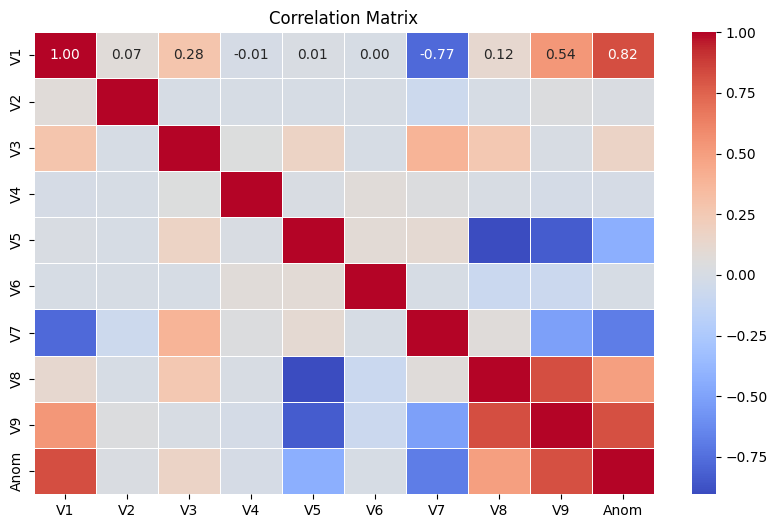

In [144]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute the correlation matrix
corr_matrix = df.corr()

# Display the matrix as a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

# Add title
plt.title("Correlation Matrix")

# Show the plot
plt.show()


In [145]:
df_unlabelled = df.drop("Anom", axis=1)

In [146]:
df_unlabelled.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9
0,50,21,77,0,28,0,27,48,22
1,53,0,82,0,52,-5,29,30,2
2,37,0,76,0,28,18,40,48,8
3,37,0,79,0,34,-26,43,46,2
4,85,0,88,-4,6,1,3,83,80


In [147]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
df_train, df_test = train_test_split(df, test_size=0.3, random_state=42)

# Print sizes to verify
print(f"Training set size: {len(df_train)}")
print(f"Testing set size: {len(df_test)}")


Training set size: 34367
Testing set size: 14730


Set up the labelled and unlabelled data

In [148]:
X_train = df_train.drop("Anom", axis=1)
Y_train = df_train[['Anom']].copy()
X_test = df_test.drop("Anom", axis=1)
Y_test = df_test[['Anom']].copy()

**Task 2: model generation and training**

Generate a suitable autoencoder model, the only restriction is that there should be only 2 latent variables. Train the model to a satistifactory result. Be aware that it will be much harder to achieve the sort of result you can get from a supervised learning model. 

**Hint**: it should not take longer than a 1000 epochs to train. However it may be difficult to train. Use different optimizers, topologies and/or weight initialisations to get convergence. Remember that achieving a perfect error means that the model will also be good at reconstructing anomalies. 


In [149]:

from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

# Load the module we need
# Note that we are import the Keras backend, which is assumed to be Tensorflow
from tensorflow.keras.layers import UpSampling2D, Reshape
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adagrad
from tensorflow.keras import backend as K


from tensorflow.keras.layers import Lambda
from tensorflow.keras.losses import mean_squared_error, binary_crossentropy, mse, KLDivergence
from tensorflow.keras.utils import plot_model

import tensorflow as tf
import os

In [150]:
from tensorflow.keras import layers, models
from sklearn.preprocessing import MinMaxScaler,StandardScaler

# Example dataset (replace `df_unlabelled` with your own data)
# data_train = X_train.values

# Normalize the data to [0, 1], need toi do on test and train separately to void data snooping
scaler = MinMaxScaler()
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)

# data_test = X_test.values

X_test = scaler.fit_transform(X_test)

# Dimensions of the input data
input_dim = X_train.shape[1]
print(input_dim)

9


In [151]:
# pip install pydot

In [152]:
# pip install graphviz

In [153]:
# This function samples random points from a distribution
# reparameterization trick
# instead of sampling from Q(z|X), sample epsilon = N(0,I)
# z = z_mean + sqrt(var) * epsilon
def sampling(args):
    """Reparameterization trick by sampling from an isotropic unit Gaussian.
    # Arguments
        args (tensor): mean and log of variance of Q(z|X)
    # Returns
        z (tensor): sampled latent vector
    """

    z_mean, z_log_var = args
    batch = K.shape(z_mean)[0]
    dim = K.int_shape(z_mean)[1]
    # by default, random_normal has mean = 0 and std = 1.0
    epsilon = K.random_normal(shape=(batch, dim))
    return z_mean + K.exp(0.5 * z_log_var) * epsilon


def plot_results(models,
                 data,
                 batch_size=128,
                 model_name="vae_mnist"):
    """Plots labels and MNIST digits as a function of the 2D latent vector
    # Arguments
        models (tuple): encoder and decoder models
        data (tuple): test data and label
        batch_size (int): prediction batch size
        model_name (string): which model is using this function
    """

    encoder, decoder = models
    x_test, y_test = data
    os.makedirs(model_name, exist_ok=True)

    filename = os.path.join(model_name, "vae_mean.png")
    # display a 2D plot of the digit classes in the latent subspace
    if (model_name == 'vae_mlp'):
        z_mean, _, _ = encoder.predict(x_test,
                                   batch_size=batch_size)
    else:
        z_mean = encoder.predict(x_test,batch_size=batch_size)
    
    plt.figure(figsize=(12, 10))
    plt.scatter(z_mean[:, 0], z_mean[:, 1], c=y_test)
    plt.colorbar()
    plt.xlabel("z[0]")
    plt.ylabel("z[1]")
    plt.savefig(filename)
    plt.show()

    filename = os.path.join(model_name, "digits_over_latent.png")
    # display a 30x30 2D manifold of digits
    n = 30
    digit_size = 28
    figure = np.zeros((digit_size * n, digit_size * n))
    # linearly spaced coordinates corresponding to the 2D plot
    # of digit classes in the latent space
    grid_x = np.linspace(np.amin(z_mean[:,0]), np.amax(z_mean[:,0]), n)
    grid_y = np.linspace(np.amin(z_mean[:,1]), np.amax(z_mean[:,1]), n)[::-1]

    z_sample = np.zeros((1,5))
    z_sample[0,2] = np.mean(z_mean[:,2])
    z_sample[0,3] = np.mean(z_mean[:,3])
    z_sample[0,4] = np.mean(z_mean[:,4])    
    for i, yi in enumerate(grid_y):
        for j, xi in enumerate(grid_x):
            z_sample[0,0] = xi
            z_sample[0,1] = yi
            x_decoded = decoder.predict(z_sample)
            digit = x_decoded[0].reshape(digit_size, digit_size)
            figure[i * digit_size: (i + 1) * digit_size,
                   j * digit_size: (j + 1) * digit_size] = digit

    plt.figure(figsize=(10, 10))
    start_range = digit_size // 2
    end_range = (n - 1) * digit_size + start_range + 1
    pixel_range = np.arange(start_range, end_range, digit_size)
    sample_range_x = np.round(grid_x, 1)
    sample_range_y = np.round(grid_y, 1)
    plt.xticks(pixel_range, sample_range_x)
    plt.yticks(pixel_range, sample_range_y)
    plt.xlabel("z[0]")
    plt.ylabel("z[1]")
    plt.imshow(figure, cmap='Greys_r')
    plt.savefig(filename)
    plt.show()

In [154]:
# Define the Encoder, inputs are the MNIST 28x28 greyscale images 
inputs = layers.Input(shape=(input_dim,))
x = layers.Dense(6, activation='relu', kernel_initializer='he_normal')(inputs)
x = layers.Dense(4, activation='relu', kernel_initializer='he_normal')(x)
latent = layers.Dense(2, activation='linear', name='latent_space')(x)  # 2 latent variables

encoded = Model(inputs,latent,name='encoded')
encoded.summary()
# plot_model(encoded, to_file='AE_encoded_etiv.png', show_shapes=True)            

# Latent space is a 5 dimensional vector space

# This is the decoder, it take the 5 dim latent vector and generates a 28x28 image
# lats = Input(shape=(2,),name='latent')
# Decoder
latent_inputs = layers.Input(shape=(2,))
x = layers.Dense(4, activation='relu', kernel_initializer='he_normal')(latent_inputs)
x = layers.Dense(6, activation='relu', kernel_initializer='he_normal')(x)
outputs = layers.Dense(input_dim, activation='sigmoid')(x)  # Sigmoid to ensure output in [0, 1]

decoded = Model(latent_inputs,outputs,name='decoded')
decoded.summary()
# plot_model(decoded, to_file='AE_decoded_etiv.png', show_shapes=True)     

# The autoencoder takes the image as input encodes it, then decodes it
rec = decoded(encoded(inputs))
autoencoder = Model(inputs,rec,name="AE")

reconstructions = autoencoder.predict(X_test)
reconstruction_loss = np.mean(np.square(reconstructions - X_test), axis=1)
# autoencoder.add_loss(lambda: reconstruction_loss) 
autoencoder.summary()

Model: "encoded"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_29 (InputLayer)       [(None, 9)]               0         
                                                                 
 dense_70 (Dense)            (None, 6)                 60        
                                                                 
 dense_71 (Dense)            (None, 4)                 28        
                                                                 
 latent_space (Dense)        (None, 2)                 10        
                                                                 
Total params: 98 (392.00 Byte)
Trainable params: 98 (392.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Model: "decoded"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input

In [155]:
autoencoder.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss='mse')

In [156]:
autoencoder.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss='mae')

In [157]:
# Train the autoencoder
history = autoencoder.fit(
    X_train,
    X_train,  # Input and output are the same for an autoencoder
    validation_data=(X_test, X_test),
    epochs=300,
    batch_size=32,
    shuffle=True,
    verbose=2,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)
    ]
)

Epoch 1/300
1074/1074 - 5s - loss: 0.4997 - val_loss: 0.4524 - 5s/epoch - 5ms/step
Epoch 2/300
1074/1074 - 4s - loss: 0.4373 - val_loss: 0.4351 - 4s/epoch - 4ms/step
Epoch 3/300
1074/1074 - 4s - loss: 0.4273 - val_loss: 0.4309 - 4s/epoch - 4ms/step
Epoch 4/300
1074/1074 - 4s - loss: 0.4247 - val_loss: 0.4293 - 4s/epoch - 4ms/step
Epoch 5/300
1074/1074 - 4s - loss: 0.4233 - val_loss: 0.4279 - 4s/epoch - 4ms/step
Epoch 6/300
1074/1074 - 4s - loss: 0.4223 - val_loss: 0.4275 - 4s/epoch - 4ms/step
Epoch 7/300
1074/1074 - 4s - loss: 0.4218 - val_loss: 0.4267 - 4s/epoch - 4ms/step
Epoch 8/300
1074/1074 - 4s - loss: 0.4213 - val_loss: 0.4264 - 4s/epoch - 4ms/step
Epoch 9/300
1074/1074 - 4s - loss: 0.4210 - val_loss: 0.4263 - 4s/epoch - 4ms/step
Epoch 10/300
1074/1074 - 4s - loss: 0.4208 - val_loss: 0.4266 - 4s/epoch - 4ms/step
Epoch 11/300
1074/1074 - 4s - loss: 0.4206 - val_loss: 0.4261 - 4s/epoch - 3ms/step
Epoch 12/300
1074/1074 - 4s - loss: 0.4203 - val_loss: 0.4254 - 4s/epoch - 4ms/step
E

Epoch 99/300
1074/1074 - 4s - loss: 0.4168 - val_loss: 0.4220 - 4s/epoch - 4ms/step
Epoch 100/300
1074/1074 - 4s - loss: 0.4169 - val_loss: 0.4225 - 4s/epoch - 4ms/step
Epoch 101/300
1074/1074 - 4s - loss: 0.4169 - val_loss: 0.4220 - 4s/epoch - 4ms/step
Epoch 102/300
1074/1074 - 4s - loss: 0.4168 - val_loss: 0.4220 - 4s/epoch - 4ms/step
Epoch 103/300
1074/1074 - 4s - loss: 0.4168 - val_loss: 0.4221 - 4s/epoch - 4ms/step
Epoch 104/300
1074/1074 - 3s - loss: 0.4169 - val_loss: 0.4223 - 3s/epoch - 3ms/step
Epoch 105/300
1074/1074 - 4s - loss: 0.4168 - val_loss: 0.4222 - 4s/epoch - 4ms/step
Epoch 106/300
1074/1074 - 4s - loss: 0.4168 - val_loss: 0.4221 - 4s/epoch - 4ms/step
Epoch 107/300
1074/1074 - 4s - loss: 0.4168 - val_loss: 0.4222 - 4s/epoch - 4ms/step
Epoch 108/300
1074/1074 - 4s - loss: 0.4168 - val_loss: 0.4221 - 4s/epoch - 4ms/step
Epoch 109/300
1074/1074 - 4s - loss: 0.4168 - val_loss: 0.4223 - 4s/epoch - 4ms/step
Epoch 110/300
1074/1074 - 4s - loss: 0.4168 - val_loss: 0.4221 - 4

In [179]:
autoencoder.save_weights('ae_mlp.h5')

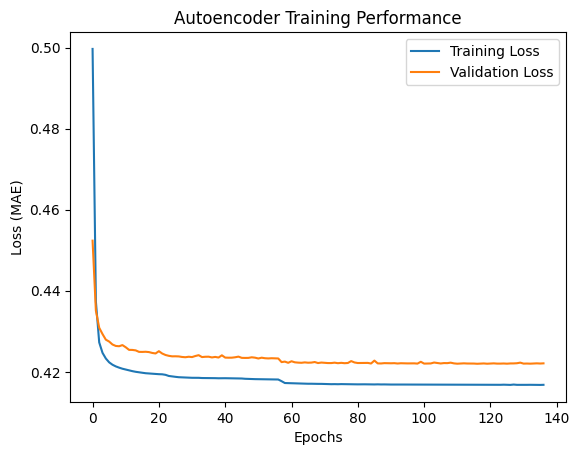

In [158]:
# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss (MAE)')
plt.legend()
plt.title('Autoencoder Training Performance')
plt.show()

In [159]:
# Evaluate on test data
reconstructions = autoencoder.predict(X_test)
reconstruction_loss = np.mean(np.square(reconstructions - X_test), axis=1)

print(f"Mean Reconstruction Loss on Test Data: {np.mean(reconstruction_loss):.4f}")

461/461 [==============================] - 1s 2ms/step
Mean Reconstruction Loss on Test Data: 0.9309


**Task 3: anomaly detection**

From the histogram of the reconstruction error decide what the cutoff should be applied to distinguish anomalies from valid samples, given that the anomaly rate is ~7%.

In [160]:
import numpy as np

# Get reconstructed values for the test data
reconstructions = autoencoder.predict(X_test)

# Calculate reconstruction error for each sample
reconstruction_errors = np.mean(np.square(reconstructions - X_test), axis=1)


461/461 [==============================] - 1s 2ms/step


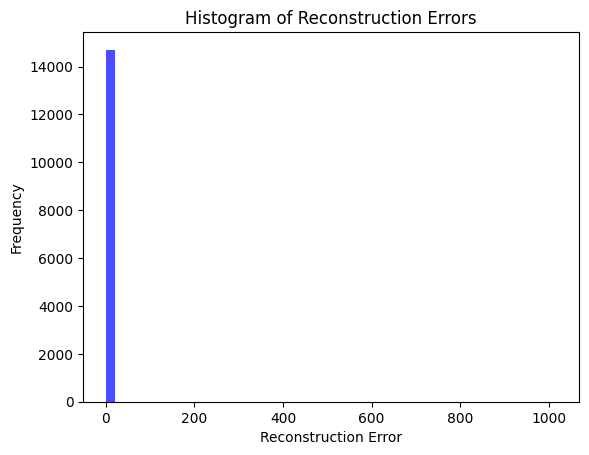

In [161]:
import matplotlib.pyplot as plt

# Plot the histogram
plt.hist(reconstruction_errors, bins=50, alpha=0.7, color='blue')
plt.xlabel("Reconstruction Error")
plt.ylabel("Frequency")
plt.title("Histogram of Reconstruction Errors")
plt.show()

In [162]:
# Calculate the 95th percentile as the cutoff for anomalies
threshold = np.percentile(reconstruction_errors, 95)

# Print the threshold
print(f"Cutoff Threshold for Anomalies: {threshold:.4f}")


Cutoff Threshold for Anomalies: 3.1955


In [163]:
# Classify samples as anomalies
anomalies = reconstruction_errors > threshold

# Print the number of anomalies
print(f"Number of anomalies: {np.sum(anomalies)}")


Number of anomalies: 737


In [164]:
# Get the total number of arrays (rows) in the 2D array
num_rows = X_test.shape[0]

# Print the number of rows (arrays)
print(f"Total number of arrays (rows): {num_rows}")

Total number of arrays (rows): 14730


In [165]:
print(np.sum(anomalies)/num_rows)

0.050033944331296674


In [166]:
# Extract the anomalous rows from the test data
anomalous_samples = X_test[anomalies]

# Optionally, display the anomalous samples
print("Anomalous Samples:")
print(anomalous_samples)


Anomalous Samples:
[[ 2.85687278e+00 -1.35336474e-02  3.24851946e-01 ... -2.59987279e+00
   2.03682464e+00  3.26293323e+00]
 [ 2.16189912e+00  1.17966179e-03 -5.79035879e-01 ... -2.45185643e+00
   3.70203984e+00  4.60943630e+00]
 [ 2.62521489e+00  6.00328984e-02 -1.27091967e-01 ... -2.52586461e+00
   2.77147840e+00  3.85202832e+00]
 ...
 [-7.72434099e-01  1.17966179e-03 -9.17993814e-01 ...  1.38429970e-01
  -2.02058878e-02 -1.03324457e-01]
 [ 2.62521489e+00 -2.82469565e-02 -1.41059887e-02 ... -2.52586461e+00
   3.79999367e+00  4.69359274e+00]
 [ 2.93409207e+00 -1.35336474e-02  3.24851946e-01 ... -2.59987279e+00
   1.84091697e+00  3.01046390e+00]]


1074/1074 [==============================] - 2s 1ms/step


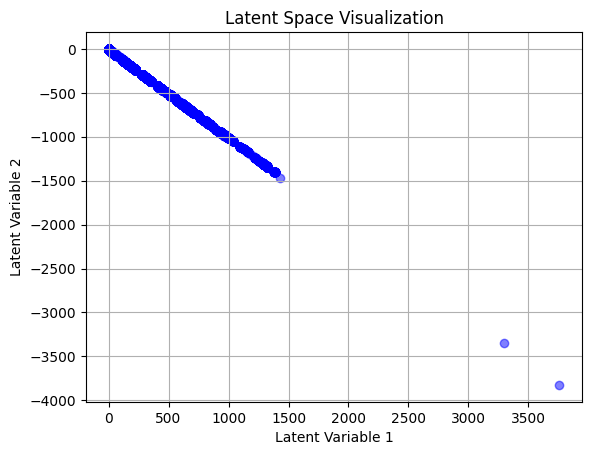

In [167]:
# Transform the training data into the latent space
latent_space = encoded.predict(X_train)

# Plot the latent space
import matplotlib.pyplot as plt

plt.scatter(latent_space[:, 0], latent_space[:, 1], c='blue', alpha=0.5)
plt.xlabel('Latent Variable 1')
plt.ylabel('Latent Variable 2')
plt.title('Latent Space Visualization')
plt.grid(True)
plt.show()


There is some structure. The anomalies are presumably the onesfar from the dense cluster.

1074/1074 [==============================] - 2s 2ms/step


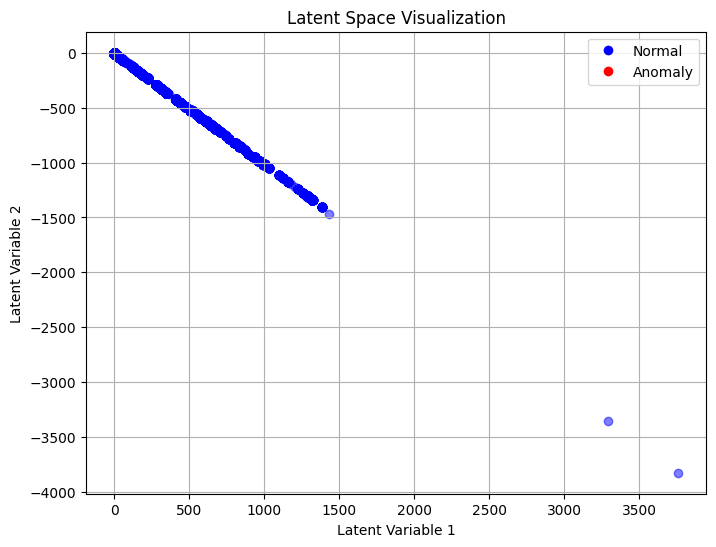

In [168]:
import matplotlib.pyplot as plt

# Transform the training data into the latent space
latent_space = encoded.predict(X_train)

# Define colors: Normal samples (blue), Anomalies (red)
colors = ['red' if label == 1 else 'blue' for label in Y_train]  # Y_train should contain 0 (normal) and 1 (anomaly)

# Plot the latent space with different colors for anomalies
plt.figure(figsize=(8, 6))
plt.scatter(latent_space[:, 0], latent_space[:, 1], c=colors, alpha=0.5)
plt.xlabel('Latent Variable 1')
plt.ylabel('Latent Variable 2')
plt.title('Latent Space Visualization')
plt.grid(True)

# Add legend
from matplotlib.lines import Line2D
legend_elements = [Line2D([0], [0], marker='o', color='w', label='Normal', markersize=8, markerfacecolor='blue'),
                   Line2D([0], [0], marker='o', color='w', label='Anomaly', markersize=8, markerfacecolor='red')]
plt.legend(handles=legend_elements)

plt.show()


461/461 [==============================] - 1s 2ms/step


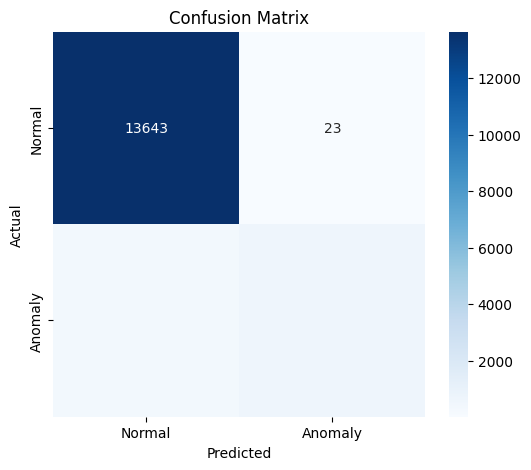

              precision    recall  f1-score   support

           0       0.97      1.00      0.99     13666
           1       0.97      0.67      0.79      1064

    accuracy                           0.97     14730
   macro avg       0.97      0.83      0.89     14730
weighted avg       0.97      0.97      0.97     14730



In [169]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

# Step 1: Get model predictions (Reconstruction Errors)
reconstructions = autoencoder.predict(X_test)  # X_test is the test data
reconstruction_errors = np.mean(np.square(X_test - reconstructions), axis=1)

# Step 2: Set an anomaly detection threshold (e.g., 95th percentile)
threshold = np.percentile(reconstruction_errors, 95)

# Step 3: Predict anomalies based on threshold
y_pred = (reconstruction_errors > threshold).astype(int)  # 1 = Anomaly, 0 = Normal

# Step 4: Get actual labels (assuming 1 = Anomaly, 0 = Normal)
y_true = Y_test  # Replace with actual anomaly labels

# Step 5: Compute Confusion Matrix
cm = confusion_matrix(y_true, y_pred)

# Step 6: Plot Confusion Matrix
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Normal', 'Anomaly'], yticklabels=['Normal', 'Anomaly'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# Step 7: Print Classification Report
print(classification_report(y_true, y_pred))


In [170]:
print(cm)

[[13643    23]
 [  350   714]]


461/461 [==============================] - 1s 2ms/step


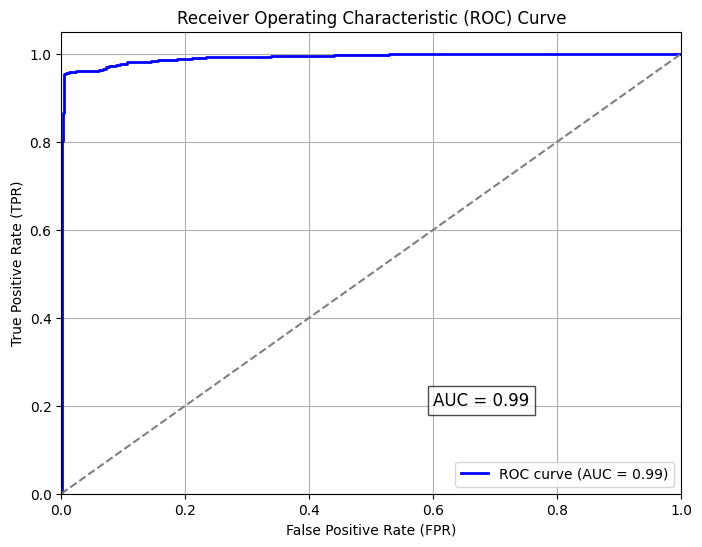

In [171]:
import seaborn as sns
from sklearn.metrics import roc_curve, auc

# Step 1: Get model predictions (Reconstruction Errors)
reconstructions = autoencoder.predict(X_test)  
reconstruction_errors = np.mean(np.square(X_test - reconstructions), axis=1)

# Step 2: Get actual labels (assuming 1 = Anomaly, 0 = Normal)
y_true = Y_test  # Replace with actual anomaly labels

# Step 3: Compute ROC Curve
fpr, tpr, thresholds = roc_curve(y_true, reconstruction_errors)

# Step 4: Compute AUC (Area Under Curve)
roc_auc = auc(fpr, tpr)

# Step 5: Plot ROC Curve
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal reference line

# Display AUC score on plot
plt.text(0.6, 0.2, f'AUC = {roc_auc:.2f}', fontsize=12, bbox=dict(facecolor='white', alpha=0.7))

# Formatting
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid()

# Show plot
plt.show()

This is a very high AUC

### Post (complete by Sunday 02/02/25)

Once you have an implemntation however rough, use the forums/topics to advertise the fact. The purpose is to get feedback from others in the group, so if you have only a basic outline then you may get ideas about how to proceed and also examples from others in your group.

No posts should refer to Task 4.

### Respond (complete by Wednesday 05/02/24)

If you feel you can provide useful advise then respond to another member of the group through the appropriate forum. Responses should be respectful and offer some sort of advise. Try and avoid clogging the forums with support or thank you messages.

In reviewing others code you will discover different ways to tackle the same problem. It is acceptable to copy parts of others code. However whole scale copying from another notebook is not acceptable.

If you stick to the deadline then it will allow yourself and others to have enough time to implement suggestions. From the Schedule you can see that this is not a hard deadline.

The posts on the forum/topic associated with this e-tivity are graded. Below is a link to the rubrics.

https://learn.ul.ie/d2l/lp/rubrics/preview.d2l?ou=49284&rubricId=2620&originTool=quicklinks

### Task 4: VAE (completed by Sunday 09/02/24)

This task is a individual task and should **not** to be uploaded to the Group Locker. No direct support should be given via the forums. Marks will be deducted if the instructions are not followed (see rubrics). This part should be uploaded directly to Brightpsace.

Change the network to be a VAE. Again determine the optimal cutoff and plot the latent variables. Check how good the cutoffs were by constructing a confusion matrix or generating a classification report. Obviously for this task you need to use the Anom column.

**Hint** you can use the model topology from the AE (with the obvious modifications). I found that I had a good model (almost as good and the supervised learning model) when the KL divergence was small. You can print out both the KL divergence and reconstruction loss for each epoch. It can be tricky to train these type of models, so do not be surprised if you do not get a stellar result. What is more important is that you have the correct code to implement the VAE.

### Final Submission (complete by Sunday 09/02/24)

Submit Tasks 1-4 in a single notebook this before the deadline on Sunday.


In [172]:
## Add additional code cells to implememt the tasks stated above 

In [173]:
import tensorflow.keras.backend as K

latent_dim = 2  # Latent space with 2 variables

# ---- Encoder ----
inputs = layers.Input(shape=(input_dim,))
x = layers.Dense(6, activation='relu', kernel_initializer='he_normal')(inputs)
x = layers.Dense(4, activation='relu', kernel_initializer='he_normal')(x)

# Latent space: Mean and Log Variance
z_mean = layers.Dense(latent_dim, name='z_mean')(x)
z_log_var = layers.Dense(latent_dim, name='z_log_var')(x)

# Reparameterization Trick
def sampling(args):
    z_mean, z_log_var = args
    epsilon = K.random_normal(shape=K.shape(z_mean))  # Noise
    return z_mean + K.exp(0.5 * z_log_var) * epsilon

z = layers.Lambda(sampling, output_shape=(latent_dim,), name='z')([z_mean, z_log_var])

# Encoder model
encoder = Model(inputs, [z_mean, z_log_var, z], name="encoder")
encoder.summary()


# ---- Decoder ----
latent_inputs = layers.Input(shape=(latent_dim,))
x = layers.Dense(4, activation='relu', kernel_initializer='he_normal')(latent_inputs)
x = layers.Dense(6, activation='relu', kernel_initializer='he_normal')(x)
outputs = layers.Dense(input_dim, activation='sigmoid')(x)  # Sigmoid for pixel intensity

# Decoder model
decoder = Model(latent_inputs, outputs, name="decoder")
decoder.summary()


# ---- VAE Model ----
z_mean, z_log_var, z = encoder(inputs)
reconstructions = decoder(z)

vae = Model(inputs, reconstructions, name="vae")

# Summary
vae.summary()


Model: "encoder"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_31 (InputLayer)       [(None, 9)]                  0         []                            
                                                                                                  
 dense_75 (Dense)            (None, 6)                    60        ['input_31[0][0]']            
                                                                                                  
 dense_76 (Dense)            (None, 4)                    28        ['dense_75[0][0]']            
                                                                                                  
 z_mean (Dense)              (None, 2)                    10        ['dense_76[0][0]']            
                                                                                            

In [174]:
vae.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss='mae')

In [175]:
# Generate the new loss function with the reconstruction error and the Kulback-Leibler
# divergence

# Calculate reconstruction error for each sample
reconstruction_loss = K.mean(K.square(reconstructions - X_test), axis=1)
z = 1 + z_log_var - K.square(z_mean) - K.exp(z_log_var)
kl_loss = -0.5*z
kl_loss = K.mean(kl_loss)
vae_loss_tot = reconstruction_loss + kl_loss
# vae.add_loss(vae_loss_tot)



In [176]:
batch_size = 32
# Train the autoencoder
history1 = vae.fit(
    X_train,
    X_train,  # Input and output are the same for an autoencoder
    validation_data=(X_test, X_test),
    epochs=100,
    batch_size=batch_size,
    shuffle=True,
    verbose=2,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)
    ]
)

Epoch 1/100
1074/1074 - 6s - loss: 0.4866 - val_loss: 0.4298 - 6s/epoch - 5ms/step
Epoch 2/100
1074/1074 - 4s - loss: 0.4216 - val_loss: 0.4250 - 4s/epoch - 3ms/step
Epoch 3/100
1074/1074 - 4s - loss: 0.4121 - val_loss: 0.3777 - 4s/epoch - 4ms/step
Epoch 4/100
1074/1074 - 4s - loss: 0.3646 - val_loss: 0.3664 - 4s/epoch - 4ms/step
Epoch 5/100
1074/1074 - 4s - loss: 0.3589 - val_loss: 0.3624 - 4s/epoch - 4ms/step
Epoch 6/100
1074/1074 - 4s - loss: 0.3571 - val_loss: 0.3615 - 4s/epoch - 4ms/step
Epoch 7/100
1074/1074 - 4s - loss: 0.3563 - val_loss: 0.3609 - 4s/epoch - 4ms/step
Epoch 8/100
1074/1074 - 4s - loss: 0.3559 - val_loss: 0.3604 - 4s/epoch - 4ms/step
Epoch 9/100
1074/1074 - 4s - loss: 0.3556 - val_loss: 0.3603 - 4s/epoch - 4ms/step
Epoch 10/100
1074/1074 - 5s - loss: 0.3551 - val_loss: 0.3598 - 5s/epoch - 4ms/step
Epoch 11/100
1074/1074 - 5s - loss: 0.3547 - val_loss: 0.3593 - 5s/epoch - 4ms/step
Epoch 12/100
1074/1074 - 4s - loss: 0.3545 - val_loss: 0.3593 - 4s/epoch - 4ms/step
E

Epoch 99/100
1074/1074 - 4s - loss: 0.3512 - val_loss: 0.3560 - 4s/epoch - 4ms/step
Epoch 100/100
1074/1074 - 4s - loss: 0.3512 - val_loss: 0.3563 - 4s/epoch - 4ms/step


In [178]:
vae.save_weights('vae_mlp.h5')

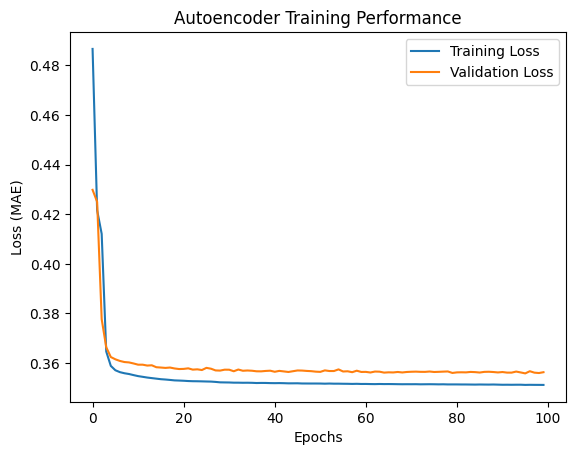

In [177]:
# Plot training and validation loss
plt.plot(history1.history['loss'], label='Training Loss')
plt.plot(history1.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss (MAE)')
plt.legend()
plt.title('Autoencoder Training Performance')
plt.show()

## Reflection

There are no specific marks allocated for a reflection. However due consideration will be given if pertinent comments or valuable insights are made.

This task proved very interesting.

AN initial take resulted in may unusual results that required graphs for debugging.

the first issue I had was data snooping. I applied the sclaer function before separating train and tets data.